# Lab 8: Define and Solve an ML Problem of Your Choosing

In [9]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [10]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the World Happiness Report (WHR) data set: "WHR2018Chapter2OnlineData.csv"
I will be predicting the label "Healthy life expectancy at birth" score.  
This is a supervised learning problem since we have labeled data with known outcomes (Healthy life expectancy at birth scores).  
This is a regression problem as the label (Healthy life expectancy at birth score) is a continuous variable.  
The features that will be used for prediction include:  
Life Ladder  
Log GDP per capita  
Social support  
Freedom to make life choices  
Generosity  
Perceptions of corruption  
Positive affect  
Negative affect  
Confidence in national government  
Democratic Quality  
Delivery Quality  
Standard deviation of ladder by country-year    
Standard deviation/Mean of ladder by country-year  
GINI index (World Bank estimate)  
GINI index (World Bank estimate), average 2000-15  
Gini of household income reported in Gallup, by wp5-year  

Importance of the Problem  
Predicting the "Healthy life expectancy at birth" score is essential for understanding and addressing public health challenges because it provides insights into the overall health and longevity of a population. Health expectancy is a crucial indicator of public health and quality of life. By pinpointing factors that influence Healthy Life Expectancy, policymakers, healthcare providers, and researchers can develop targeted interventions to improve public health outcomes such as a healthier population, reduced healthcare costs, and increased productivity and well-being. This project is crucial for identifying health disparities and driving evidence-based policy decisions.
Different companies, especially healthcare companies, can use a model that predicts this label to develop targeted interventions, improve patient outcomes, and optimize resource allocation.



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [11]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import zscore

# Addressing Missingness
# Replacing missing values with column means
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verifying that missing values are handled
print("\nMissing Values after Imputation:")
print(df.isnull().sum())

# Winsorization to replace outliers
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

# Inspecting the column names
print("\nColumn Names Before Renaming:")
print(df.columns)

# Renaming Features and Labels
df.rename(columns={
    'Life Ladder': 'Happiness Score',
    'Log GDP per capita': 'Log GDP',
    'Healthy life expectancy at birth': 'Healthy Life Expectancy',
    'Freedom to make life choices': 'Freedom of Choice',
    'Perceptions of corruption': 'Corruption Perception',
    'Confidence in national government': 'Govt Confidence',
    'Democratic Quality': 'Democracy Quality',
    'Delivery Quality': 'Service Delivery Quality'
}, inplace=True)

# Inspecting the column names after renaming
print("\nColumn Names After Renaming:")
print(df.columns)

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Dropping irrelevant features
df.drop(columns=['Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)'], inplace=True)

# Splitting the data into features and target variable
X = df.drop(columns=['Healthy Life Expectancy'])
y = df['Healthy Life Expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing Values after Imputation:
country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

# PROJECT PLAN
1. New Feature List  
Key Features:  
i.	Happiness Score (formerly Life Ladder)  
ii.	Log GDP (formerly Log GDP per capita)  
iii.	Social support  
iv.	Freedom of Choice (formerly Freedom to make life choices)  
v.	Generosity  
vi.	Corruption Perception (formerly Perceptions of corruption)  
vii.	Positive affect  
viii.	Negative affect  
ix.	Govt Confidence (formerly Confidence in national government)  
x.	Democracy Quality (formerly Democratic Quality)  
xi.	Service Delivery Quality (formerly Delivery Quality)  
xii.	All one-hot encoded categorical features (countries)  
Excluded Features:  
i.	Standard deviation/Mean of ladder by country-year  
ii.	GINI index (World Bank estimate)  
2. Data Preparation Techniques  
i.	Handling Missing Values: Fill missing values with the mean for numerical columns.  
ii.	Outlier Detection and Handling: Use Winsorization to limit extreme values.  
iii.	Feature Engineering: Apply one-hot encoding to categorical variables like 'country' to convert them into numerical format.  
iv.	Scaling: Standardize the features by removing the mean and scaling to unit variance using StandardScaler.  
v.	Train-Test Split: Split the data into training and testing sets to evaluate model performance effectively.  
3. Model Selection  
Baseline model: Linear Regression for initial assessment.  
Alternative models: Explore Decision Trees, Random Forests, Gradient Boosting, Support Vector Regression, and Neural Networks.  
Model evaluation: Assess performance using metrics like Mean Squared Error (MSE) and R-squared.  
Model validation: Employ cross-validation to ensure generalizability.  
Hyperparameter tuning: Optimize model performance through grid search or random search.  
4. Model Training and Evaluation:
i.	Train a linear regression model as a baseline.
ii.	Evaluate model performance using metrics like Mean Squared Error (MSE) and R-squared.
iii.	Model Refinement and Selection:
iv.	Employ cross-validation to assess model generalization.
v.	Tune hyperparameters for complex models (SVR, Gradient Boosting, Neural Networks) using techniques like grid search or random search.
vi.	Compare model performance to select the optimal model based on accuracy and generalizability.
5. Model Improvement and Deployment:
i.	Analyze model errors to identify areas for improvement.
ii.	Consider feature engineering or selection to enhance model performance.
iii.	Implement robust monitoring to detect performance degradation.
iv.	Regularly retrain the model with new data to maintain accuracy.
6. Performance Monitoring:
i.	Continuously monitor model performance on new data to detect any degradation in performance.
ii.	Retrain the model periodically with new data to keep it up-to-date.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Mean Squared Error: 0.463252982452073
R-squared: 0.9918122544381132
Linear Regression CV Mean R-squared: -3.6362810628248954e+20
Decision Tree CV Mean R-squared: 0.8833404858824718
Random Forest CV Mean R-squared: 0.9330813678175179
Gradient Boosting CV Mean R-squared: 0.919294060228508
SVR CV Mean R-squared: 0.8007770706746442
Neural Network CV Mean R-squared: 0.9281337201366979
Best parameters for Random Forest: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Random Forest Mean Squared Error: 122.90398016752619
Random Forest R-squared: -1.1722612833021486

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Columns: 179 entries, year to country_Zimbabwe
dtypes: float64(15), int64(1), uint8(163)
memory usage: 444.0 KB

Key Statistics:


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              year  Happiness Score      Log GDP  Social support  \
count  1562.000000      1562.000000  1562.000000     1562.000000   
mean   2011.838028         5.441845     9.222484        0.813578   
std       3.387623         1.076885     1.113247        0.108353   
min    2006.000000         3.701401     7.224040        0.566867   
25%    2009.000000         4.606351     8.330659        0.749794   
50%    2012.000000         5.332600     9.361684        0.831776   
75%    2015.000000         6.271025    10.167549        0.904097   
max    2017.000000         7.381171    10.818947        0.949940   

       Healthy Life Expectancy  Freedom of Choice   Generosity  \
count              1562.000000        1562.000000  1562.000000   
mean                 62.319040           0.731296    -0.002789   
std                   7.513213           0.135862     0.145663   
min                  46.883904           0.461706    -0.232023   
25%                  57.344959           0.635676    -0.1

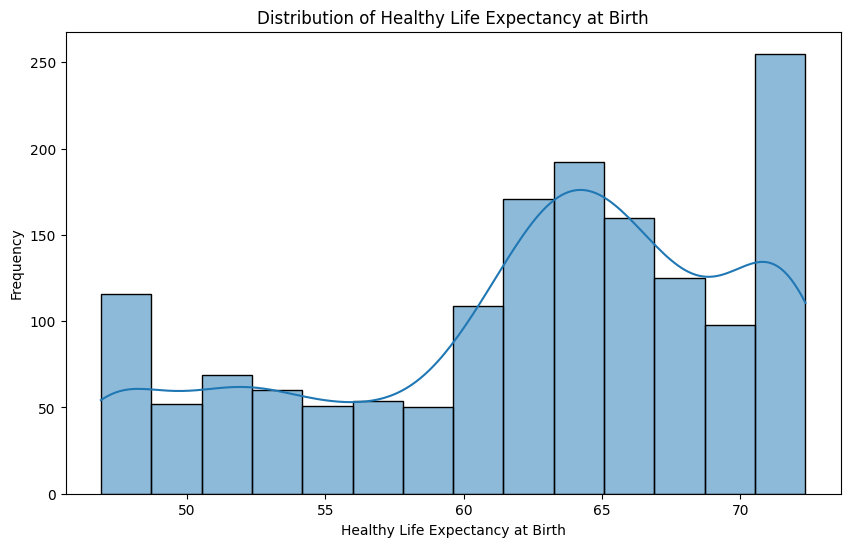

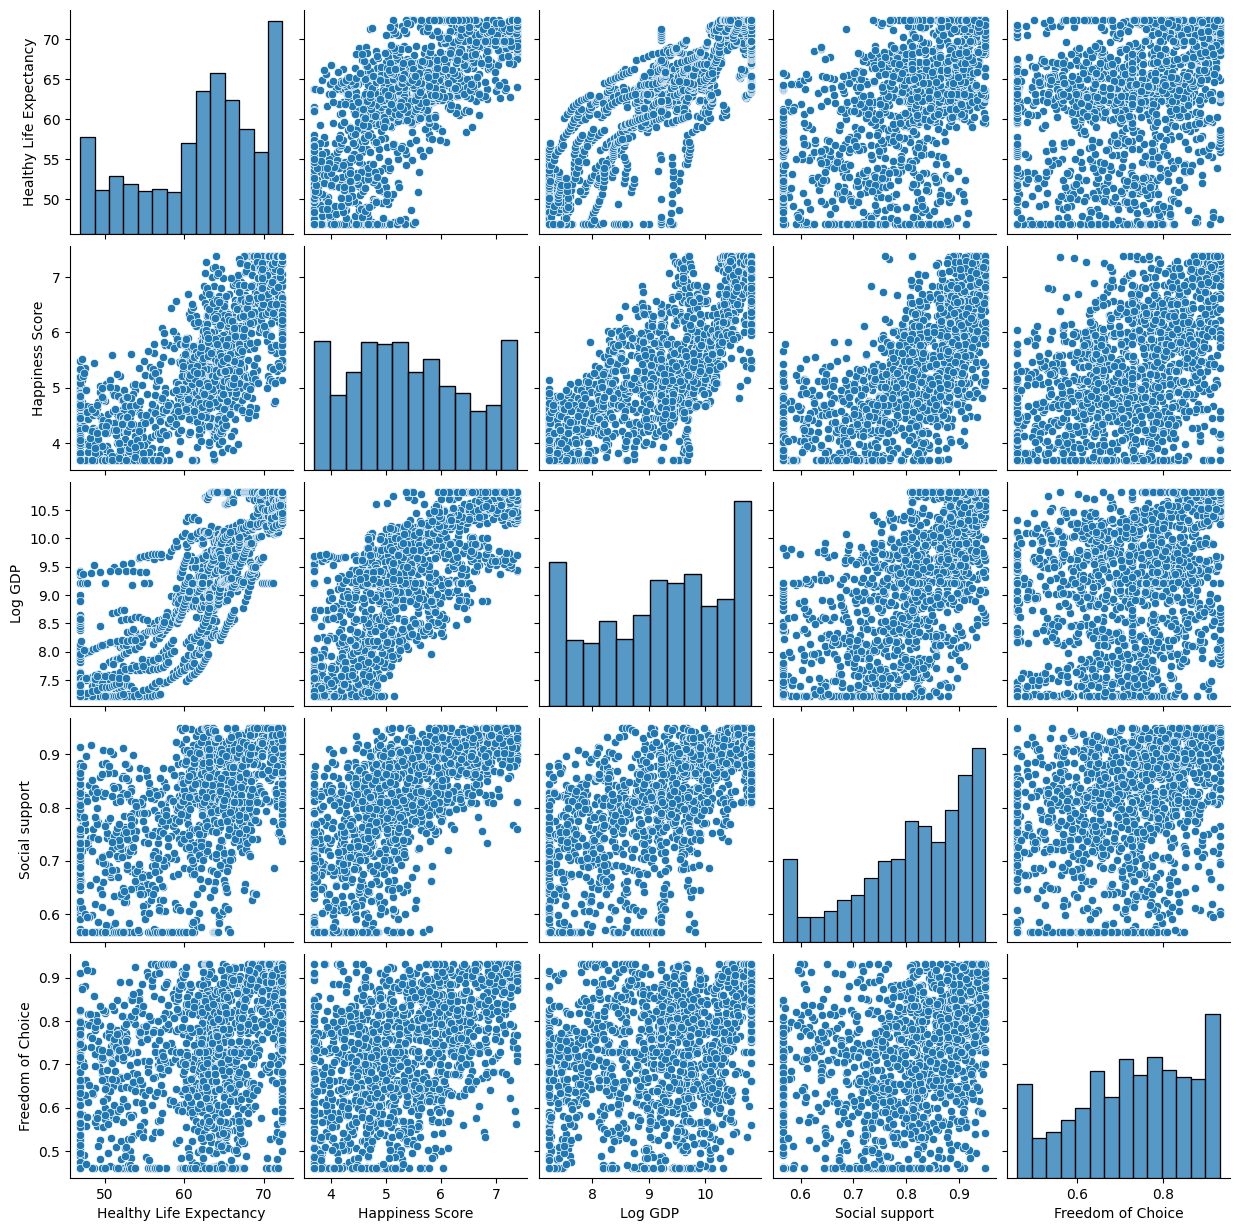

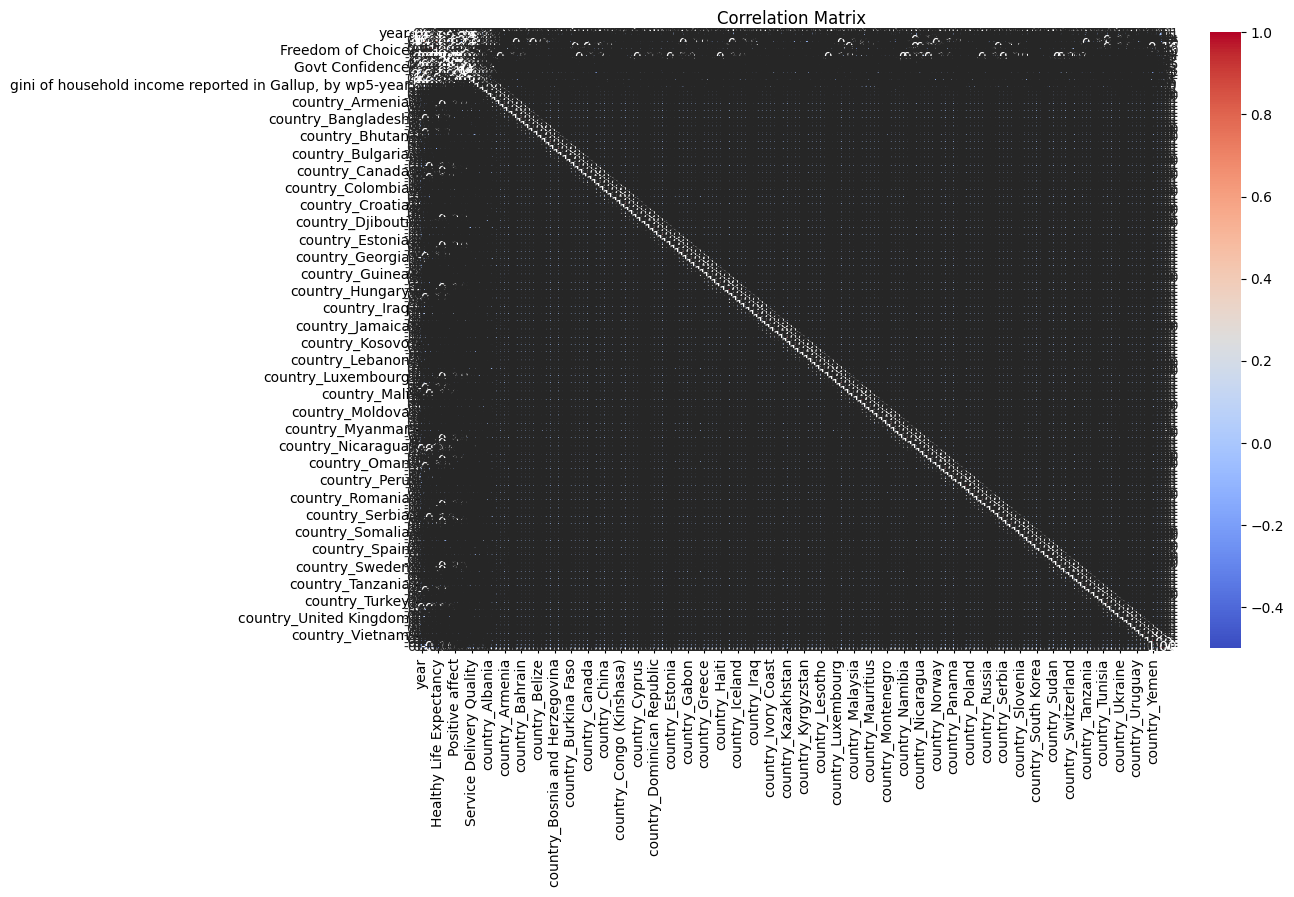

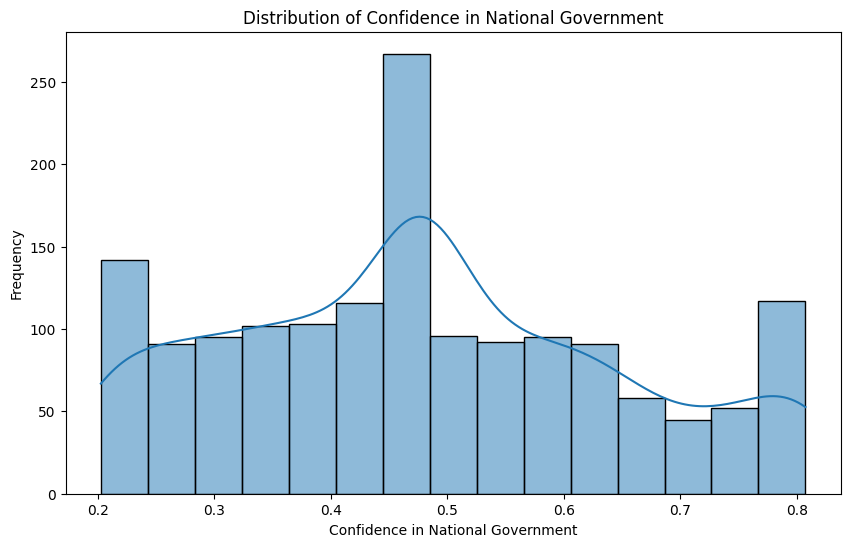

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Improving model performance
# Trying different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=2000, learning_rate_init=0.001, early_stopping=True, random_state=42)
}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='r2')
    print(f"{model_name} CV Mean R-squared: {cv_scores.mean()}")

# Perform GridSearchCV for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30]
}

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluating the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Final DataFrame Information
print("\nFinal DataFrame Info:")
df.info()

# Inspect and Analyze Data

# Get key statistics for each column
print("\nKey Statistics:")
print(df.describe())

# Inspect the data types of each column
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of 'Healthy Life Expectancy'
plt.figure(figsize=(10, 6))
sns.histplot(df['Healthy Life Expectancy'], kde=True)
plt.title('Distribution of Healthy Life Expectancy at Birth')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and labels using pairplot
sns.pairplot(df[['Healthy Life Expectancy', 'Happiness Score', 'Log GDP', 'Social support', 'Freedom of Choice']])
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Check for class imbalance in 'Govt Confidence'
plt.figure(figsize=(10, 6))
sns.histplot(df['Govt Confidence'], kde=True)
plt.title('Distribution of Confidence in National Government')
plt.xlabel('Confidence in National Government')
plt.ylabel('Frequency')
plt.show()